In [1]:
import schemdraw
from schemdraw import elements as elm
from schemdraw import logic
from schemdraw import transform
from schemdraw.util import Point

In [2]:
Point((1, 1))

Point(1,1)

In [3]:
p1 = Point((1, 1))
p2 = Point((2, 2))
p3 = p1 + p2
assert p3 == Point((3, 3))
p3

Point(3,3)

In [4]:
p4 = p2-p1
assert p4 == Point((1, 1))
assert p2-1 == Point((1, 1))
assert 1 - p2 == Point((-1, -1))
p4

Point(1,1)

In [5]:
t = transform.Transform(0, (0,0))
t

Transform: xy=Point(0,0); theta=0; scale=1

In [6]:
assert t.transform((1, 1)) == Point((1, 1))

In [7]:
t = transform.Transform(0, (1, 1))
assert t.transform((1, 1)) == Point((2, 2))

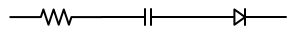

In [8]:
# add_elements function
d = schemdraw.Drawing()
d.add_elements(
    elm.Resistor(),
    elm.Capacitor(),
    elm.Diode())
d

In [9]:
# Matplotlib backend
d.get_imagedata('svg')

b'<?xml version="1.0" encoding="utf-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<!-- Created with matplotlib (https://matplotlib.org/) -->\n<svg height="35.82pt" version="1.1" viewBox="0 0 295.92 35.82" width="295.92pt" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n <metadata>\n  <rdf:RDF xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n   <cc:Work>\n    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>\n    <dc:date>2021-01-30T12:37:00.658221</dc:date>\n    <dc:format>image/svg+xml</dc:format>\n    <dc:creator>\n     <cc:Agent>\n      <dc:title>Matplotlib v3.3.2, https://matplotlib.org/</dc:title>\n     </cc:Agent>\n    </dc:creator>\n   </cc:Work>\n  </rdf:RDF>\n </metadata>\n <defs>\n  <style type="text/css">*{stroke-linecap:butt;stroke-linejoin:round;}</style>\

In [10]:
# SVG backend
schemdraw.use('svg')
d.get_imagedata('svg')

b'<?xml version="1.0" encoding="utf-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<!-- Created with matplotlib (https://matplotlib.org/) -->\n<svg height="35.82pt" version="1.1" viewBox="0 0 295.92 35.82" width="295.92pt" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n <metadata>\n  <rdf:RDF xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">\n   <cc:Work>\n    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>\n    <dc:date>2021-01-30T12:37:00.728550</dc:date>\n    <dc:format>image/svg+xml</dc:format>\n    <dc:creator>\n     <cc:Agent>\n      <dc:title>Matplotlib v3.3.2, https://matplotlib.org/</dc:title>\n     </cc:Agent>\n    </dc:creator>\n   </cc:Work>\n  </rdf:RDF>\n </metadata>\n <defs>\n  <style type="text/css">*{stroke-linecap:butt;stroke-linejoin:round;}</style>\

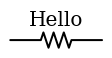

In [11]:
d = schemdraw.Drawing(font='serif', fontsize=20)
d += elm.Resistor().label('Hello')
d.draw(backend='matplotlib')

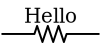

In [12]:
d = schemdraw.Drawing(font='serif', fontsize=20)
d += elm.Resistor().label('Hello')
d.draw(backend='svg')

In [13]:
d.save('savetest.png')

In [14]:
# Draw on matplotlib axis, or specify existing axis
import matplotlib.pyplot as plt

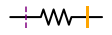

In [15]:
schemdraw.use('matplotlib')
d = schemdraw.Drawing()
d.add(elm.Resistor)
schemfig = d.draw()
schemfig.ax.axvline(.5, color='purple', ls='--')
schemfig.ax.axvline(2.5, color='orange', ls='-', lw=3);
display(schemfig)

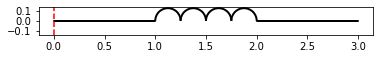

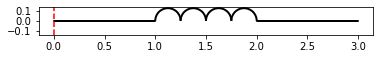

In [16]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
d = schemdraw.Drawing()
d += elm.Inductor()
d.draw(ax=ax)
ax.axvline(0, ls='--', color='red')
fig

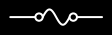

In [17]:
schemdraw.theme('dark')
d = schemdraw.Drawing()
d += elm.FuseUS()
d.draw()

In [18]:
d.save('testMPL.png')

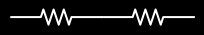

In [19]:
# Capstyle names are different in SVG vs Matplotlib
# projecting == butt
d = schemdraw.Drawing()
d += elm.Resistor(capstyle='butt')
d += elm.Resistor(capstyle='projecting')
d.draw()

In [20]:
d = schemdraw.Drawing()
d += elm.Resistor(capstyle='butt')
d += elm.Resistor(capstyle='projecting')
d.draw(backend='svg')

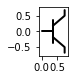

In [21]:
schemdraw.theme('default')
d = schemdraw.Drawing()
d += elm.Bjt()
d.draw(showframe=True)

In [22]:
d = schemdraw.Drawing()
d += elm.Bjt()
d.draw(backend='svg', showframe=True)

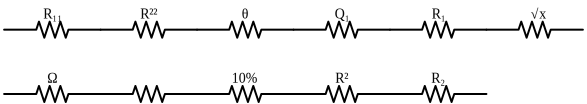

In [23]:
# Test some mathtext in svg backend
schemdraw.use('svg')
d = schemdraw.Drawing(font='Times')
d += elm.Resistor().label('$R_{11}$')
d += elm.Resistor().label('$R^{22}$')
d += elm.Resistor().label(r'$\theta$')
d += elm.Resistor().label('$\overline{Q_1}$')
d += elm.Resistor().label('$R_1$')
d += elm.Resistor().label('$\sqrt{x}$')
d.here = (0, -2)
d += elm.Resistor().label('Ω')
d += elm.Resistor().label('∠')
d += elm.Resistor().label('10%')
d += elm.Resistor().label('$R^2$')
d += elm.Resistor().label('$R_2$')
d.draw()

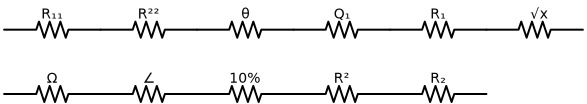

In [24]:
# Test some mathtext in svg backend
schemdraw.use('svg')
d = schemdraw.Drawing(font='sans')
d += elm.Resistor().label('$R_{11}$')
d += elm.Resistor().label('$R^{22}$')
d += elm.Resistor().label(r'$\theta$')
d += elm.Resistor().label('$\overline{Q_1}$')
d += elm.Resistor().label('$R_1$')
d += elm.Resistor().label('$\sqrt{x}$')
d.here = (0, -2)
d += elm.Resistor().label('Ω')
d += elm.Resistor().label('∠')
d += elm.Resistor().label('10%')
d += elm.Resistor().label('$R^2$')
d += elm.Resistor().label('$R_2$')
d.draw()

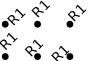

In [25]:
# Test some mathtext in svg backend
schemdraw.use('svg')
d = schemdraw.Drawing()
d += elm.Dot().label('R1', rotate=45)
d += elm.Dot().at((1, 0)).label('R1', rotate=45, halign='center')
d += elm.Dot().at((2, 0)).label('R1', rotate=45, halign='right')
d += elm.Dot().at((0, 1)).label('R1', rotate=45, valign='top')
d += elm.Dot().at((1, 1)).label('R1', rotate=45, valign='bottom')
d += elm.Dot().at((2, 1)).label('R1', rotate=45, valign='center')
d.draw()

In [26]:
from schemdraw.backends import svgtext
from IPython.display import SVG
# These should appear similar to
# https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/demo_text_rotation_mode.html

In [27]:
svghead = '<svg xmlns="http://www.w3.org/2000/svg" xml:lang="en" height="150pt" width="150pt">{}</svg>'
s = svgtext.text_tosvg('ABC', 50, 50, halign='left', rotation=45, testmode=True)
SVG(svghead.format(s))

In [28]:
# "anchor" rotation mode
s = svgtext.text_tosvg('ABC', 30, 30, rotation=30,
                       halign='left', valign='top', 
                       testmode=True)
s += svgtext.text_tosvg('ABC', 90, 30, rotation=30,
                       halign='center', valign='top', 
                       testmode=True)
s += svgtext.text_tosvg('ABC', 150, 30, rotation=30,
                       halign='right', valign='top', 
                       testmode=True)
s += svgtext.text_tosvg('ABC', 30, 80, rotation=30,
                       halign='left', valign='center', 
                       testmode=True)
s += svgtext.text_tosvg('ABC', 90, 80, rotation=30,
                       halign='center', valign='center', 
                       testmode=True)
s += svgtext.text_tosvg('ABC', 150, 80, rotation=30,
                       halign='right', valign='center', 
                       testmode=True)
s += svgtext.text_tosvg('ABC', 30, 130, rotation=30,
                       halign='left', valign='bottom', 
                       testmode=True)
s += svgtext.text_tosvg('ABC', 90, 130, rotation=30,
                       halign='center', valign='bottom', 
                       testmode=True)
s += svgtext.text_tosvg('ABC', 150, 130, rotation=30,
                       halign='right', valign='bottom', 
                       testmode=True)

SVG(svghead.format(s))

In [29]:
# "default" rotation mode
s = svgtext.text_tosvg('ABC', 30, 30, rotation=30,
                       halign='left', valign='top', 
                       rotation_mode='default', testmode=True)
s += svgtext.text_tosvg('ABC', 90, 30, rotation=30,
                       halign='center', valign='top', 
                       rotation_mode='default', testmode=True)
s += svgtext.text_tosvg('ABC', 150, 30, rotation=30,
                       halign='right', valign='top', 
                       rotation_mode='default', testmode=True)
s += svgtext.text_tosvg('ABC', 30, 80, rotation=30,
                       halign='left', valign='center', 
                       rotation_mode='default', testmode=True)
s += svgtext.text_tosvg('ABC', 90, 80, rotation=30,
                       halign='center', valign='center', 
                       rotation_mode='default', testmode=True)
s += svgtext.text_tosvg('ABC', 150, 80, rotation=30,
                       halign='right', valign='center', 
                       rotation_mode='default', testmode=True)
s += svgtext.text_tosvg('ABC', 30, 130, rotation=30,
                       halign='left', valign='bottom', 
                       rotation_mode='default', testmode=True)
s += svgtext.text_tosvg('ABC', 90, 130, rotation=30,
                       halign='center', valign='bottom', 
                       rotation_mode='default', testmode=True)
s += svgtext.text_tosvg('ABC', 150, 130, rotation=30,
                       halign='right', valign='bottom', 
                       rotation_mode='default', testmode=True)

SVG(svghead.format(s))

In [30]:
svghead = '<svg xmlns="http://www.w3.org/2000/svg" xml:lang="en" height="150pt" width="150pt">{}</svg>'
s = svgtext.text_tosvg('$A^x$ + $B_1$', 50, 50, halign='left', rotation=145, testmode=True)
SVG(svghead.format(s))

In [31]:
svghead = '<svg xmlns="http://www.w3.org/2000/svg" xml:lang="en" height="150pt" width="150pt">{}</svg>'
s = svgtext.text_tosvg('$A^{xy}$ + $B_{11}$', 50, 50, halign='left', size=22, rotation=-45, testmode=True)
SVG(svghead.format(s))